# Bài tập thực hành 1
## Xây dựng cây quyết định và rừng cây trên dữ liệu Titanic

### 1. Tải thư viện và nạp dữ liệu

In [ ]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Nạp dữ liệu Titanic từ Kaggle 
df = pd.read_csv('train.csv')

# Xem qua dữ liệu
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### 2. Tiền xử lý dữ liệu

In [2]:
# Chọn các đặc trưng quan trọng và xử lý giá trị thiếu
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Age'].fillna(df['Age'].median(), inplace=True)  # Điền giá trị thiếu bằng trung vị
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Mã hóa giới tính

# Tách đặc trưng (X) và nhãn (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\HUONG\AppData\Local\Temp\ipykernel_15916\4291758248.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Điền giá trị thiếu bằng trung vị


### 3. Xây dựng và huấn luyện mô hình Cây quyết định

In [3]:
# Khởi tạo và huấn luyện mô hình Cây quyết định
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Đánh giá mô hình
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)
print(f"Training Accuracy: {train_score:.2f}")
print(f"Testing Accuracy: {test_score:.2f}")

Training Accuracy: 0.83
Testing Accuracy: 0.80


### 4. Hiển thị Cây quyết định (dùng graphviz)

In [4]:
# Xuất cây quyết định thành định dạng DOT
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("titanic_decision_tree", view=True)  # Lưu và hiển thị cây (cần cài graphviz)

'titanic_decision_tree.pdf'

### 5. Xây dựng và huấn luyện mô hình Rừng cây (Random Forest)

In [5]:
# Khởi tạo và huấn luyện mô hình Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Đánh giá mô hình
train_score_rf = rf.score(X_train, y_train)
test_score_rf = rf.score(X_test, y_test)
print(f"Random Forest Training Accuracy: {train_score_rf:.2f}")
print(f"Random Forest Testing Accuracy: {test_score_rf:.2f}")

Random Forest Training Accuracy: 0.86
Random Forest Testing Accuracy: 0.78


### 6. Tối ưu hóa tham số cho Random Forest (GridSearchCV)

In [6]:
# Định nghĩa lưới tham số
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
cv_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1)
cv_rf.fit(X_train, y_train)

# In tham số tốt nhất
print("Best parameters:", cv_rf.best_params_)

# Đánh giá mô hình với tham số tối ưu
best_rf = cv_rf.best_estimator_
test_score_best_rf = best_rf.score(X_test, y_test)
print(f"Best Random Forest Testing Accuracy: {test_score_best_rf:.2f}")

Best parameters: {'max_depth': 5, 'n_estimators': 50}
Best Random Forest Testing Accuracy: 0.80


### 7. Vẽ biểu đồ mức độ quan trọng của các đặc trưng

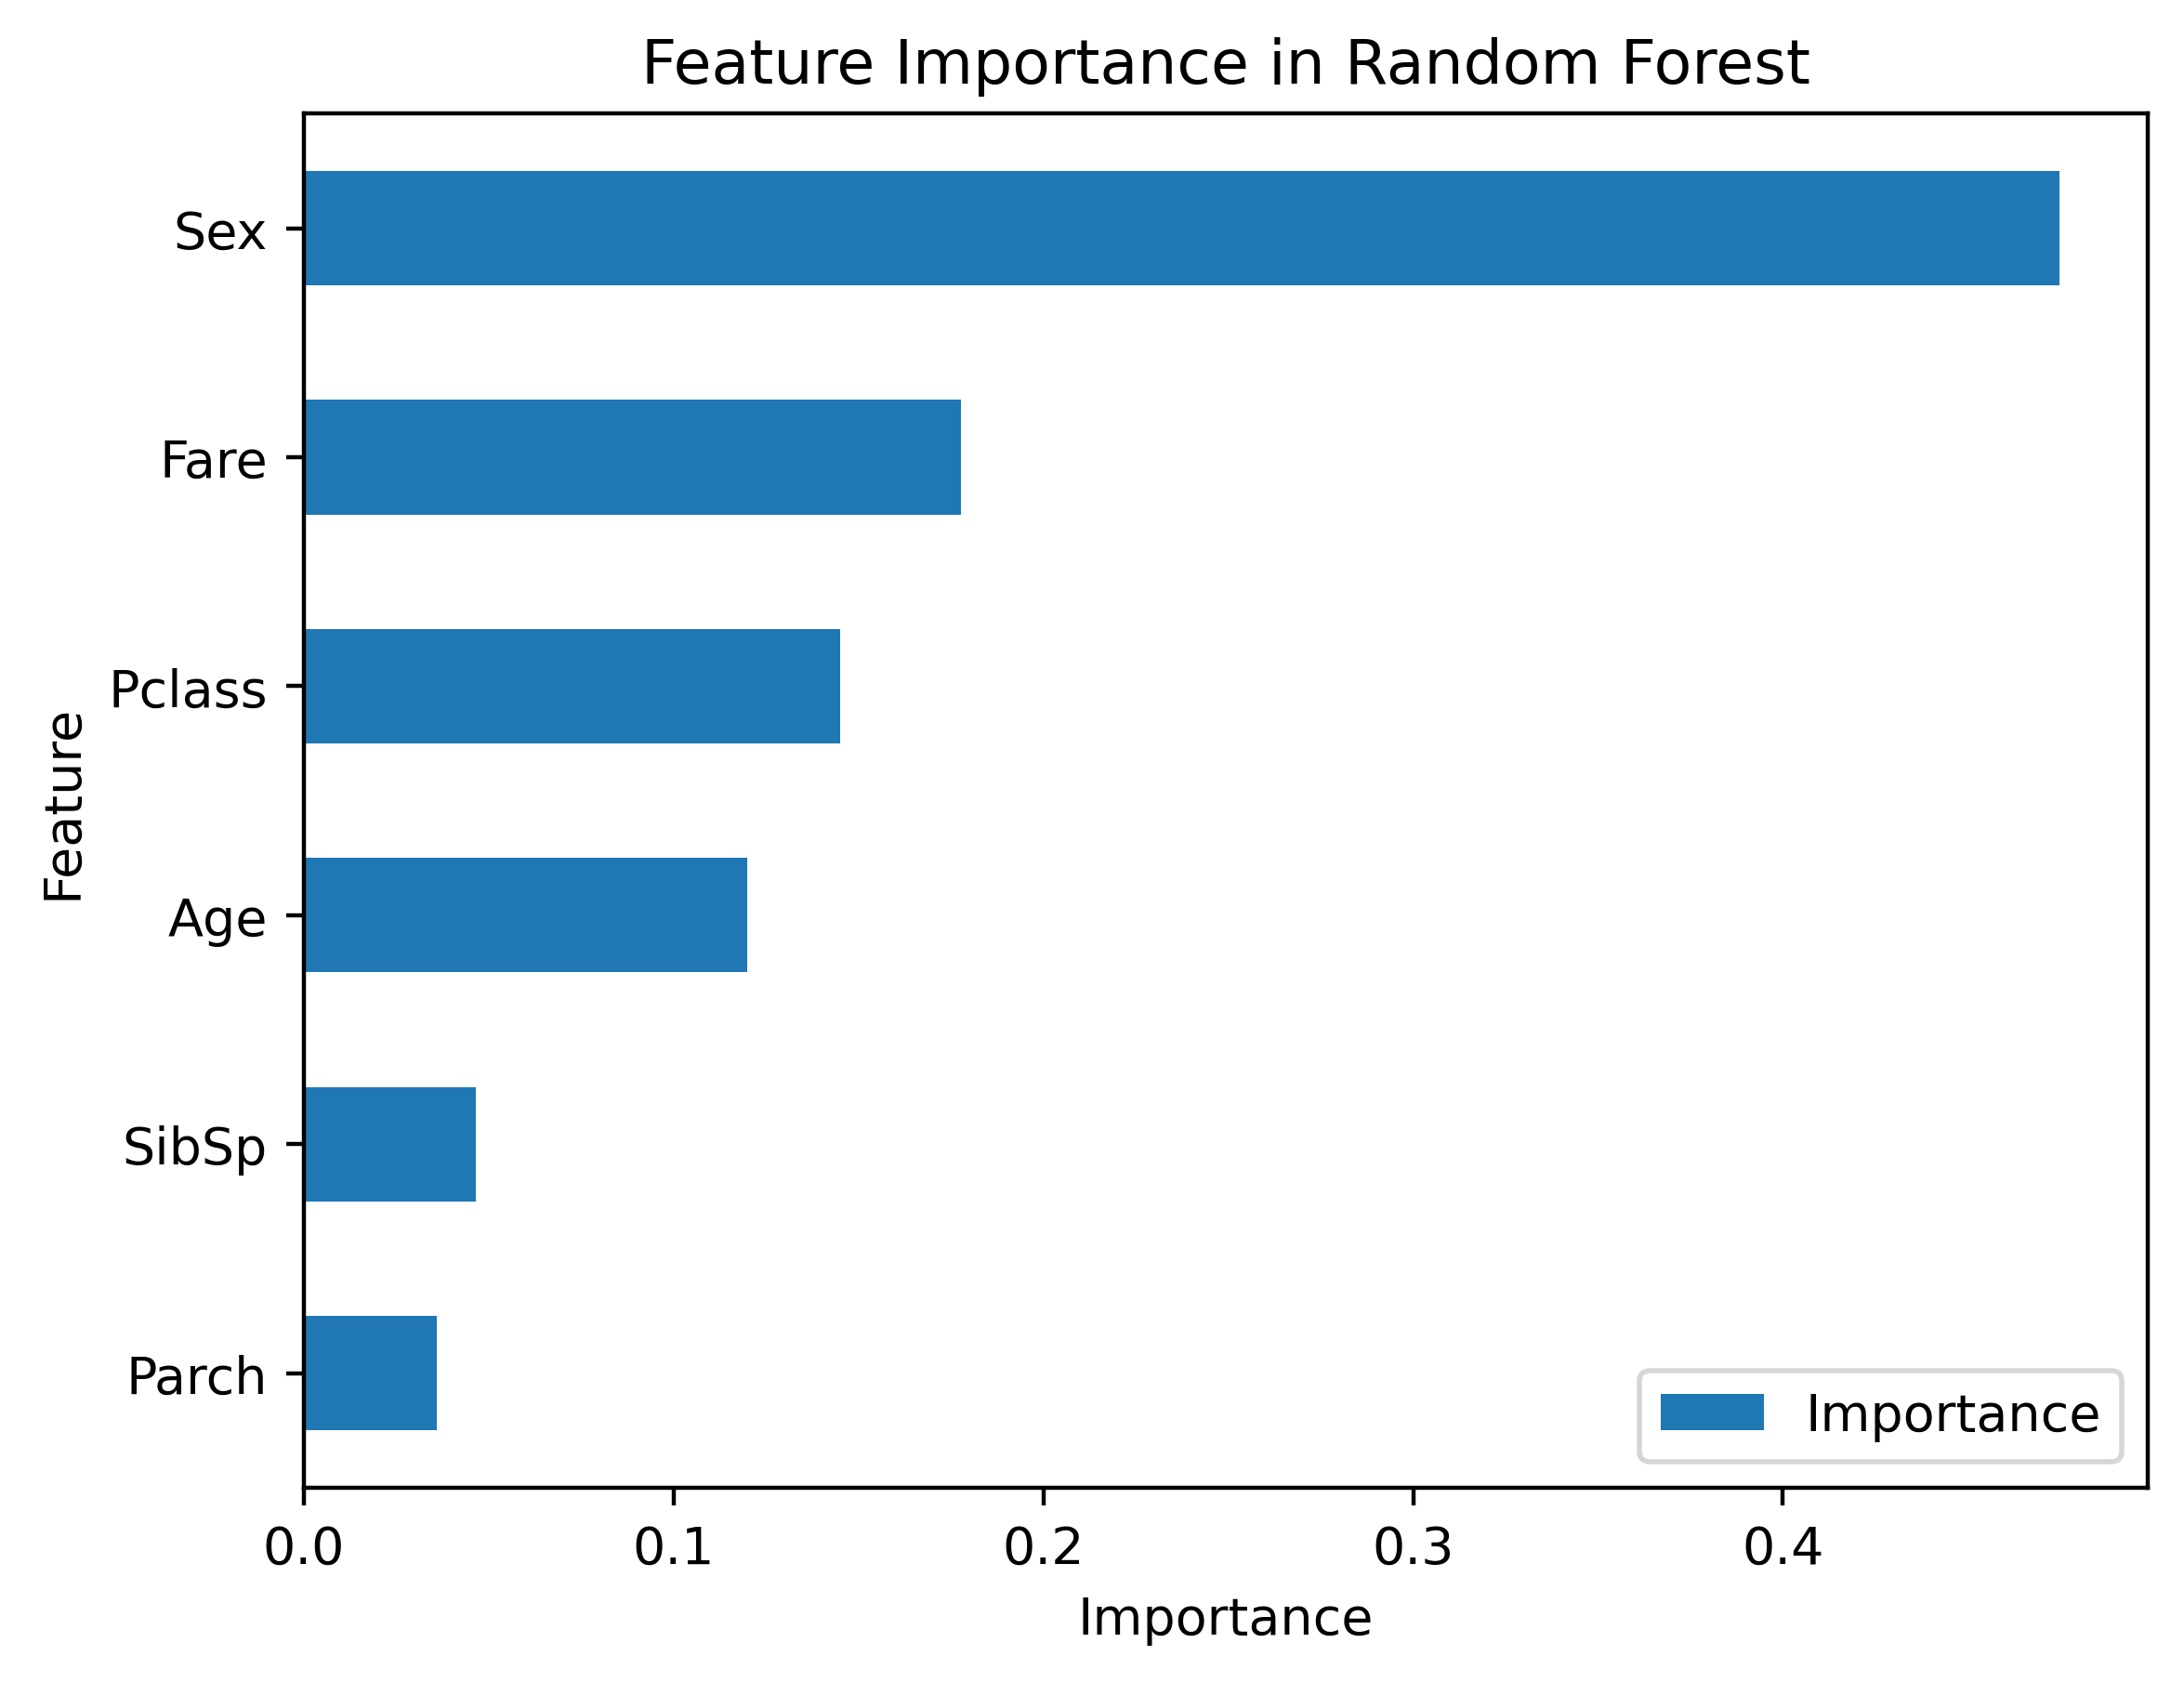

In [7]:
# Tạo DataFrame cho mức độ quan trọng
feat_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_rf.feature_importances_})
feat_importance = feat_importance.sort_values('Importance', ascending=True)

# Vẽ biểu đồ
feat_importance.plot.barh(x='Feature', y='Importance')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()